
# Week 3 Data Security
types of information:
1. Personal Information - Anything that can identify a person
2. Pseudonymous Information - Personal information that has changed in a way 3. that can no longer be attributed to an person
3. De-indentified information - removes information from the user
4. Anonymous information - Data where all DIRECT and INDIRECT indentifyers have been removed
> We can use it for whatever we want and if we loose it we dont have to notify


If there is a data breach we can be fined




Regulations principles
1. Purpose
> - Use PI for legitimate purposes
> - Describe the purposes at the point of collection
> - Do not use PI for purposes where anonymous data will sufice
> - Do not use PI for incompatible purposes without a fresh consent

2. Accountable
> - Baked privacy by Privacy by Design
> - appropiately secure and protect PI with trusted vendors only
> - Honor contracts with partners and only use data for permitted purposes
> - Do not prioritize delivery over privacy. Users will bear the consquences of the mistakes and the 'court of public opinon' is unforgiving

3. Control 
> - Ensure activities do not conflict with individual exercise their data rights
> - Individual's choices are reflected in our activities
> - Honor choices quickly - within timescales prescribed by privacy laws

4. Transparency
> - Describe to individuals the data we collect how we use and share it, and their rights over their personal information, and update regularly to ensure accuracy
> - We notify the privacy team planned changes in advance so we can use new personal information for nre purposes
> - Do not assume that amending privacy give us the retroactive rights to use the data for new purposes.








# Descriptive Analytics
Types
- Categorical (booleans, strings)
- Numerical (discrete finite, continuous or infinite)


# Probability Distributions
They could be
- Discrete
- Continious

## Descrete 
## 1. Uniform Distribution

Denoted with U followed with the range of the value
U(a,b) 
X ~ U(3,7) 
all outcomes has equal probability
the bars would be equan since they are equally likely

the expected value has no relevant information.
the mean and the variables are completety uninterpretable and have no power.

### 2. Bernulli Distribution

It can be 

p = probablity of preffered outcome

Bern(p)

X ~ Bern(p) 

ex coin flip. One true or false question,

we have two bars 0,1, the 0 bar will get to p while the 1 bar will get to 1-p

we typically denote the higher one to P and the lower one is 1-P

- variance (sigma squared) = p(1-p)
- standard deviation = sqrt(variance) = sqrt(p(1-p))

### 3. Binomial Distribution
n = number of tryals
p = probability pf success
B(n, p)

X~ B(10, 0.6)

the graph will have n+1 bars and earch bar represents the likelyhood of obtained the desired outcomes a specific number of times.


### 4. Poisson Distribution
Po(lambda)

Y ~ Po(lambda)

If how you know how often something happens for a period of time
 
If a firefly lights on 3 times if 4 seconds what is the probability of it lighing 5 times in 8 seconds.



The number of instances the event happens on a standard amount of times (x) and the (y) would be the probability of it happening.

lambda = how many times average occurs on the given standard time

# Confidence Interval

More accurate representation of the reality

Level of confidence = 1 - $\alpha$


If we want to a 95% of confidence, $\alpha$ is 5%


Confidence interval = [ point estimate - reliability factor * standard error,  point estimate + reliability factor * standard error]


## Point estimate = at the point in the middle of the interval
## Standard  Error  = standard deviation / sqrt(n) where n is the number of points
## reliability factor = Z sub alpha/2 = you will get this from adding column + row name of the z from the table



     *----------------------------------*----------------------------------*
start interval ---------------------- point estimate -------------------- end interval




If you dont have the populaton variance but do have a sample of data
sample mean
sample std


we can use the student t distribution, we can use the sample instead of the population similar we go to the table





* [The data Science Course 2022: Complete Data Science Boot Camp](https://redventures.udemy.com/the-data-science-course-complete-data-science-bootcamp/learn/lecture/10762798#content)
    * Sections 17 (22 min)
    * Sections 18 (44 min)
    * Sections 20 (10 min)

# Logistic regression 
- Is used for categories


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
raw_data = pd.read_csv('data/Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [7]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [8]:
y = data['Admitted']
x1 = data['SAT']

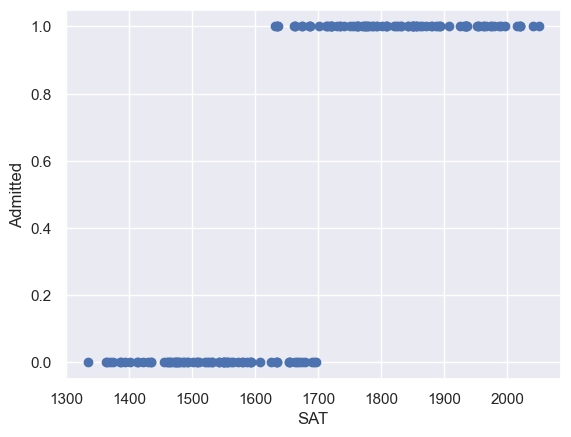

In [9]:
plt.scatter(x1,y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

# Plot with linear regression



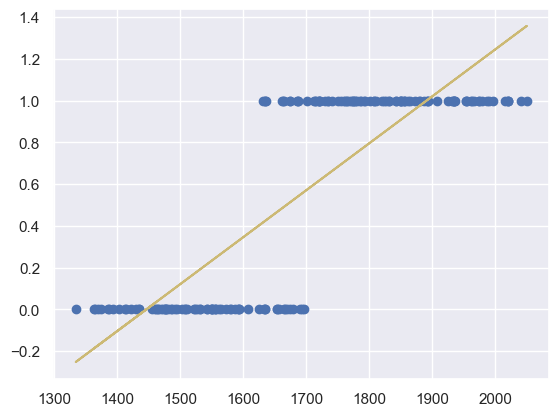

In [11]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()


plt.scatter(x1, y, color='C0')
y_hat = x1*results_lin.params[1] + results_lin.params[0]
plt.plot(x1, y_hat, color='C8')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


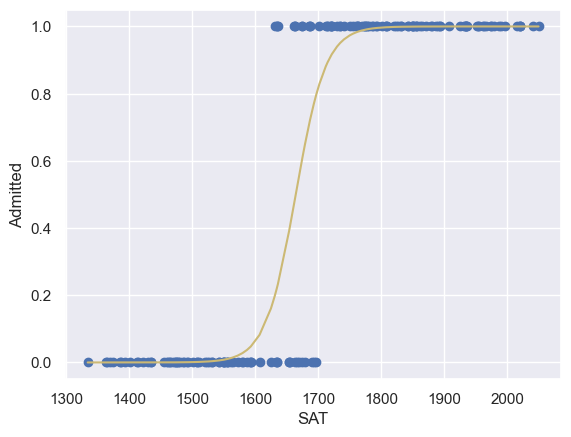

In [16]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))
                   
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.plot(x_sorted,f_sorted, color='C8')
plt.show()